In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import pandas as pd

from plotter import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.2

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

In [3]:
year = '2018'
nfiles = len(subprocess.getoutput("ls infiles-split/"+year+"*.json").split())
outsum = {} #processor.dict_accumulator()

In [4]:
# Read the histogram from the pickle file
fatjetkin_ggf = pickle.load(open(year+'/fatjetkin.pkl','rb')).integrate('region','signal-ggf')
smalljetkin_ggf = pickle.load(open(year+'/smalljetkin.pkl','rb')).integrate('region','signal-ggf')

fatjetkin_vbf = pickle.load(open(year+'/fatjetkin.pkl','rb')).integrate('region','signal-vbf')
smalljetkin_vbf = pickle.load(open(year+'/smalljetkin.pkl','rb')).integrate('region','signal-vbf')

fatjetkin_tot = pickle.load(open(year+'/fatjetkin.pkl','rb')).integrate('region',['signal-ggf','signal-vbf'])
smalljetkin_tot = pickle.load(open(year+'/smalljetkin.pkl','rb')).integrate('region',['signal-ggf','signal-vbf'])

smalljetflav_tot = pickle.load(open(year+'/smalljetflav.pkl','rb')).integrate('region',['signal-vbf','signal-ggf'])
smalljetflav_vbf = pickle.load(open(year+'/smalljetflav.pkl','rb')).integrate('region','signal-vbf')

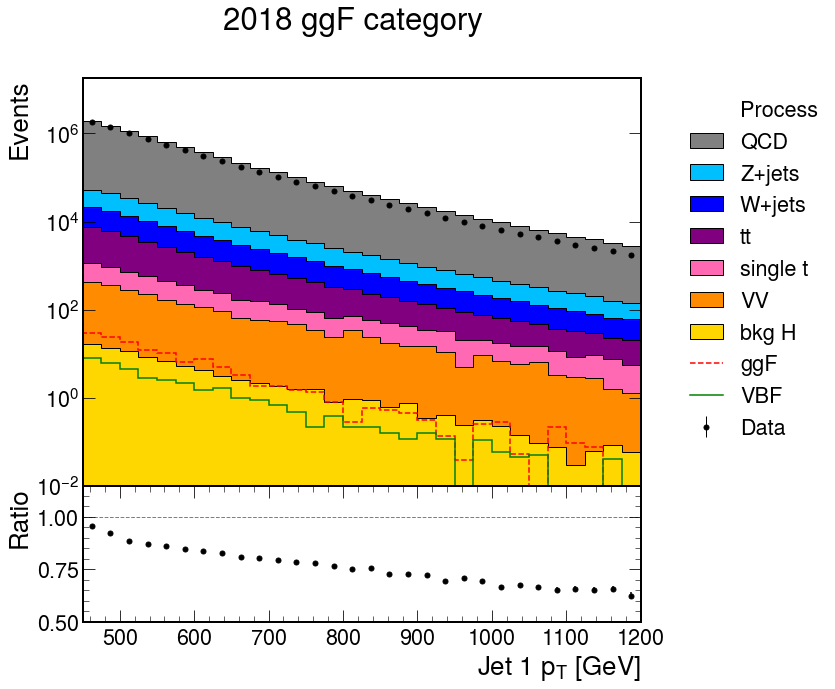

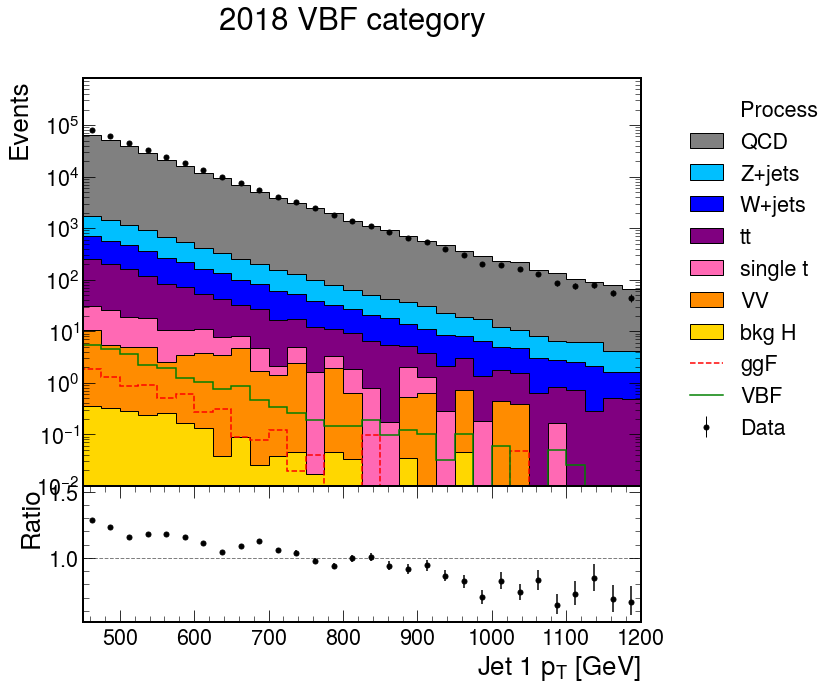

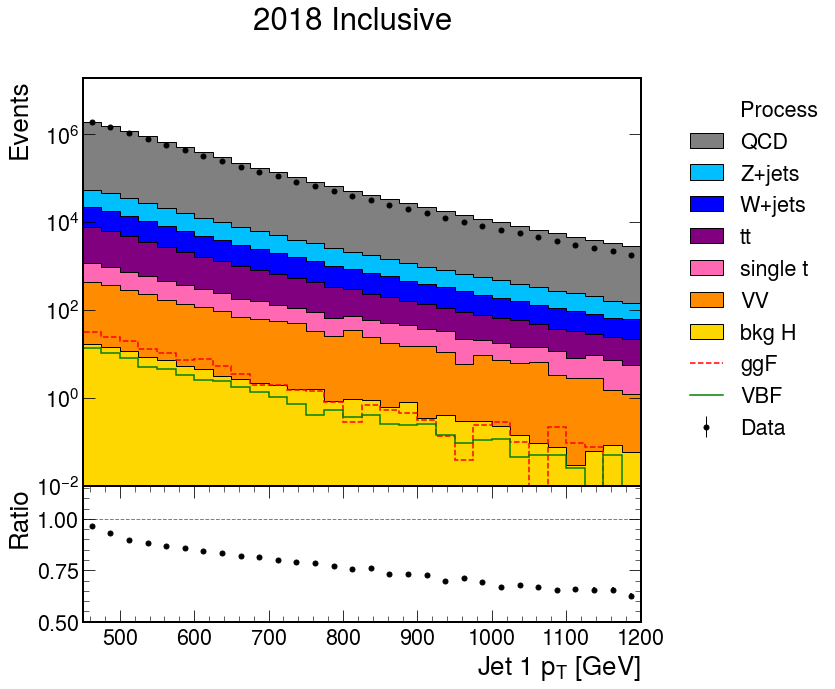

In [5]:
plot_datamc_ggfvbf(fatjetkin_ggf.sum('eta1','n2ddt1'), year+'/datamc_ggf_pt1', 'Jet 1 $p_T$ [GeV]', year+' ggF category')
plot_datamc_ggfvbf(fatjetkin_vbf.sum('eta1','n2ddt1'), year+'/datamc_vbf_pt1', 'Jet 1 $p_T$ [GeV]', year+' VBF category')
plot_datamc_ggfvbf(fatjetkin_tot.sum('eta1','n2ddt1'), year+'/datamc_tot_pt1', 'Jet 1 $p_T$ [GeV]', year+' Inclusive')

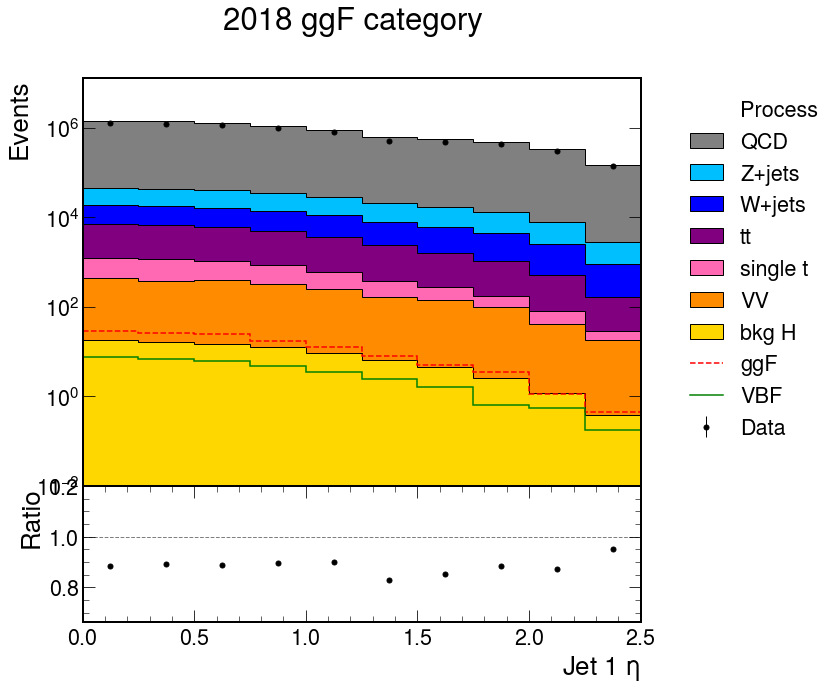

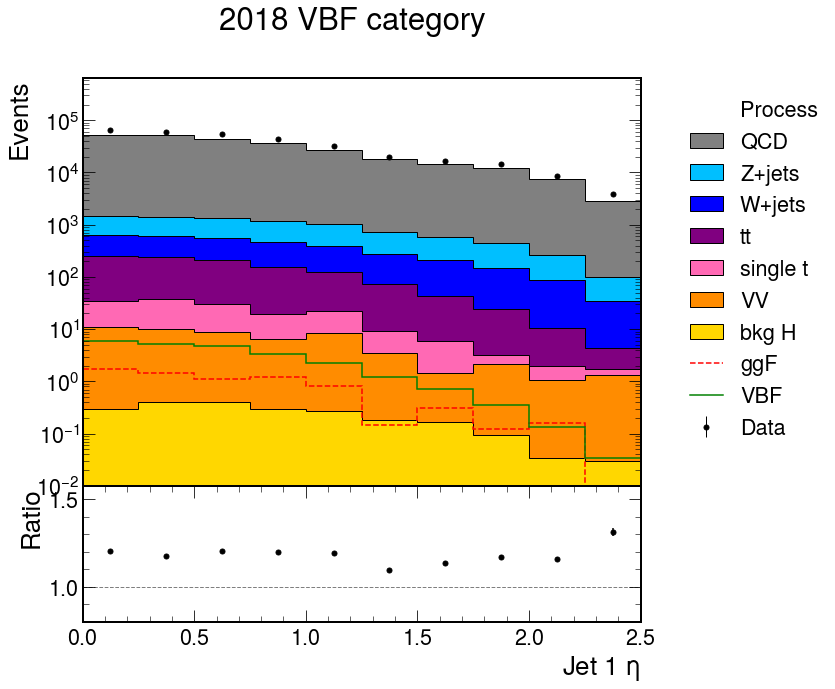

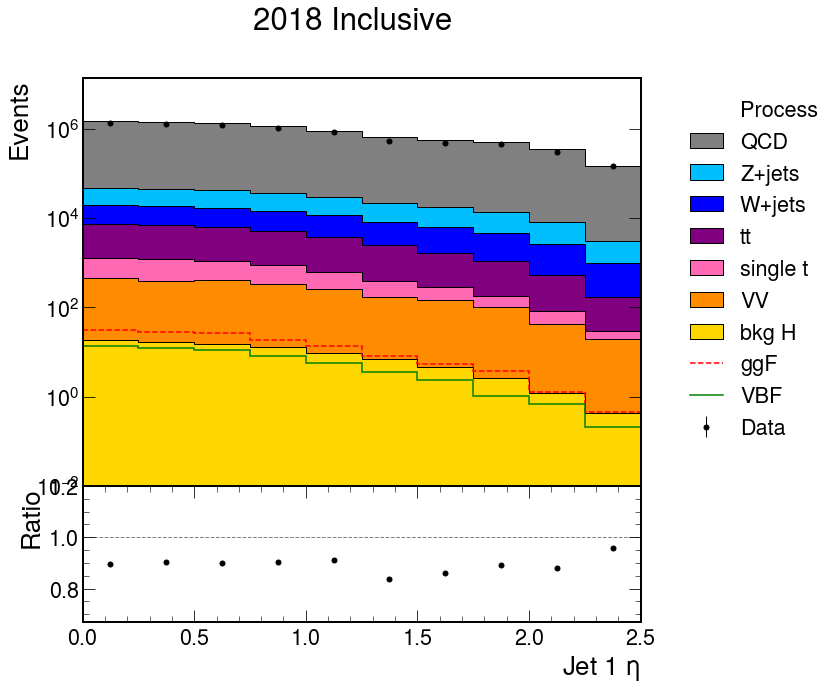

In [6]:
plot_datamc_ggfvbf(fatjetkin_ggf.sum('pt1','n2ddt1'), year+'/datamc_ggf_eta1', 'Jet 1 $\eta$', year+' ggF category',xlim=2.5)
plot_datamc_ggfvbf(fatjetkin_vbf.sum('pt1','n2ddt1'), year+'/datamc_vbf_eta1', 'Jet 1 $\eta$', year+' VBF category',xlim=2.5)
plot_datamc_ggfvbf(fatjetkin_tot.sum('pt1','n2ddt1'), year+'/datamc_tot_eta1', 'Jet 1 $\eta$', year+' Inclusive',xlim=2.5)

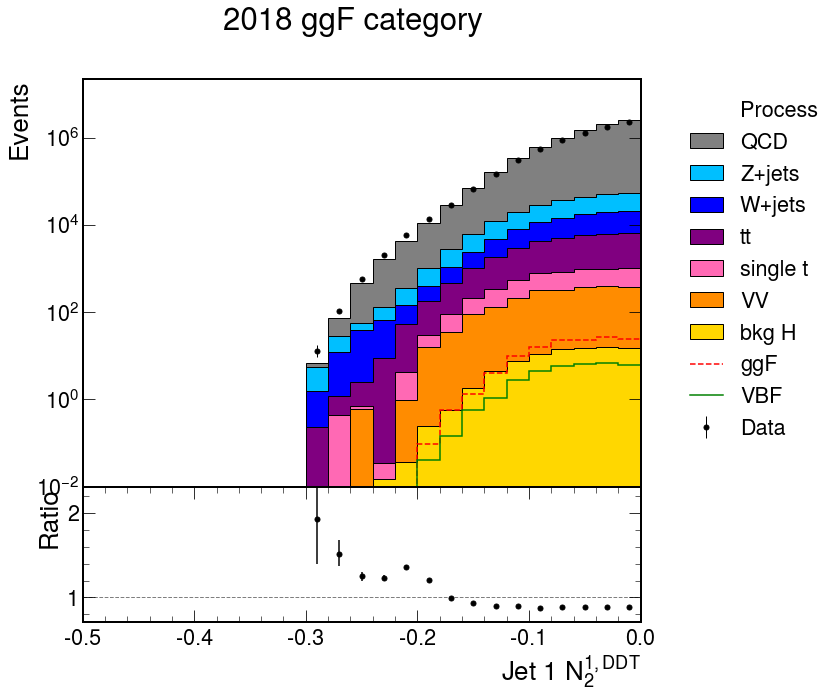

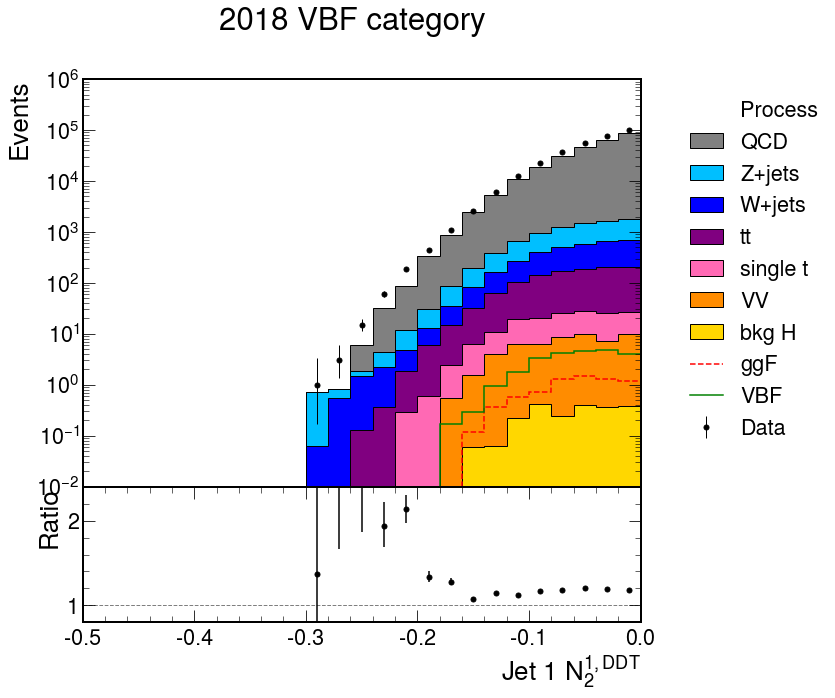

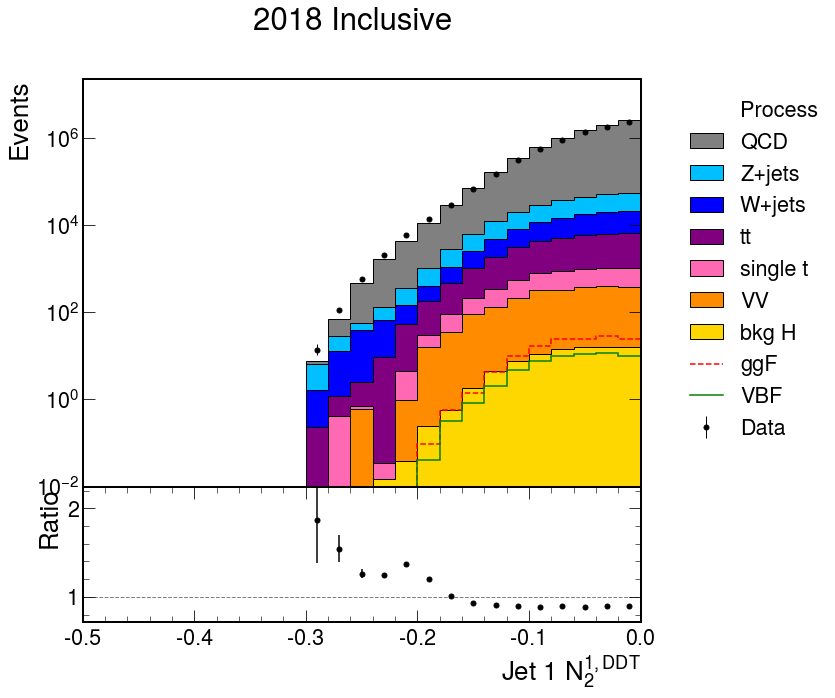

In [7]:
plot_datamc_ggfvbf(fatjetkin_ggf.sum('pt1','eta1'), year+'/datamc_ggf_n2ddt1', 'Jet 1 $N_2^{1,DDT}$', year+' ggF category')
plot_datamc_ggfvbf(fatjetkin_vbf.sum('pt1','eta1'), year+'/datamc_vbf_n2ddt1', 'Jet 1 $N_2^{1,DDT}$', year+' VBF category')
plot_datamc_ggfvbf(fatjetkin_tot.sum('pt1','eta1'), year+'/datamc_tot_n2ddt1', 'Jet 1 $N_2^{1,DDT}$', year+' Inclusive')

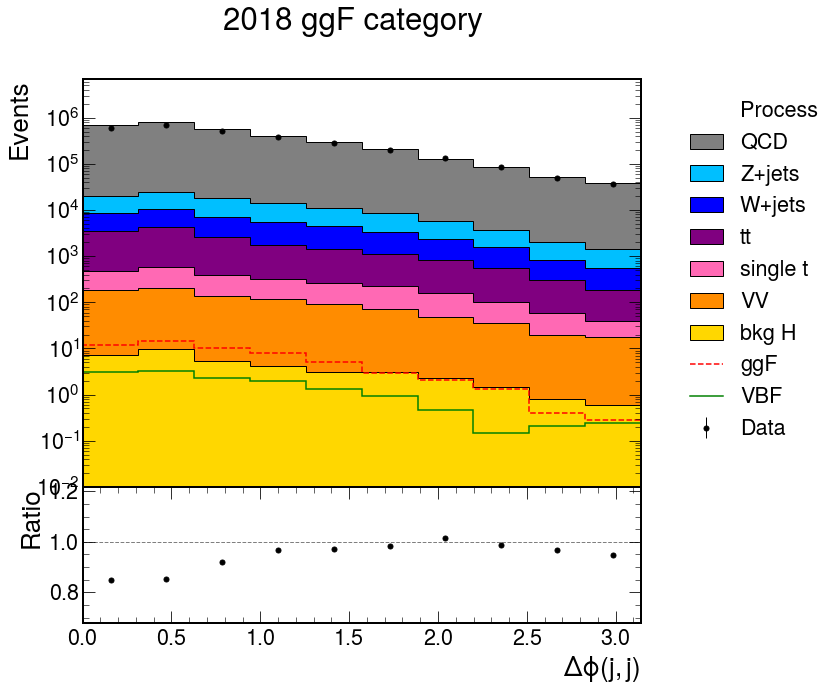

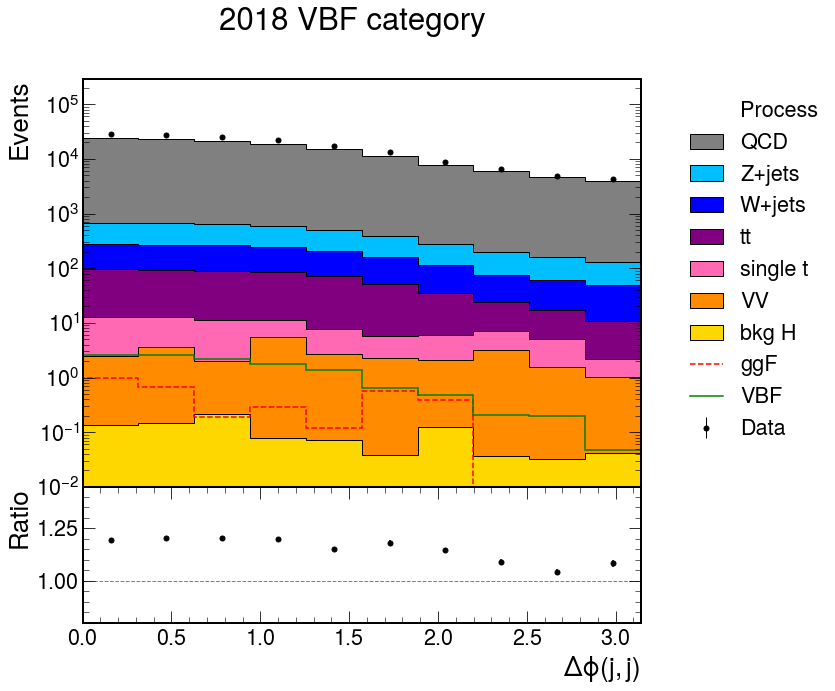

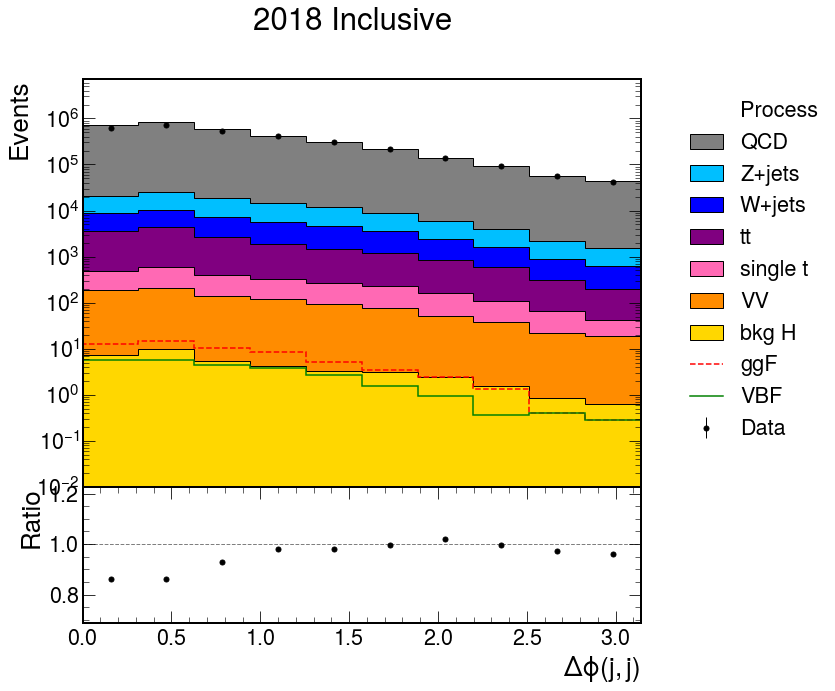

In [8]:
plot_datamc_ggfvbf(smalljetkin_ggf.sum('deta','mjj'), year+'/datamc_ggf_dphi', '$\Delta \phi (j,j)$', year+' ggF category',xlim=3.14)
plot_datamc_ggfvbf(smalljetkin_vbf.sum('deta','mjj'), year+'/datamc_vbf_dphi', '$\Delta \phi (j,j)$', year+' VBF category',xlim=3.14)
plot_datamc_ggfvbf(smalljetkin_tot.sum('deta','mjj'), year+'/datamc_tot_dphi', '$\Delta \phi (j,j)$', year+' Inclusive',xlim=3.14)

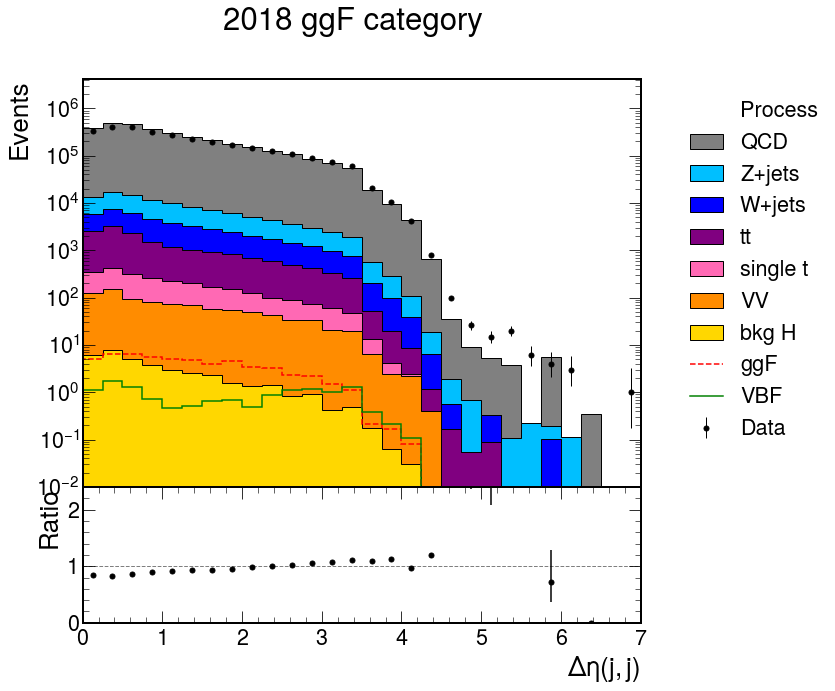

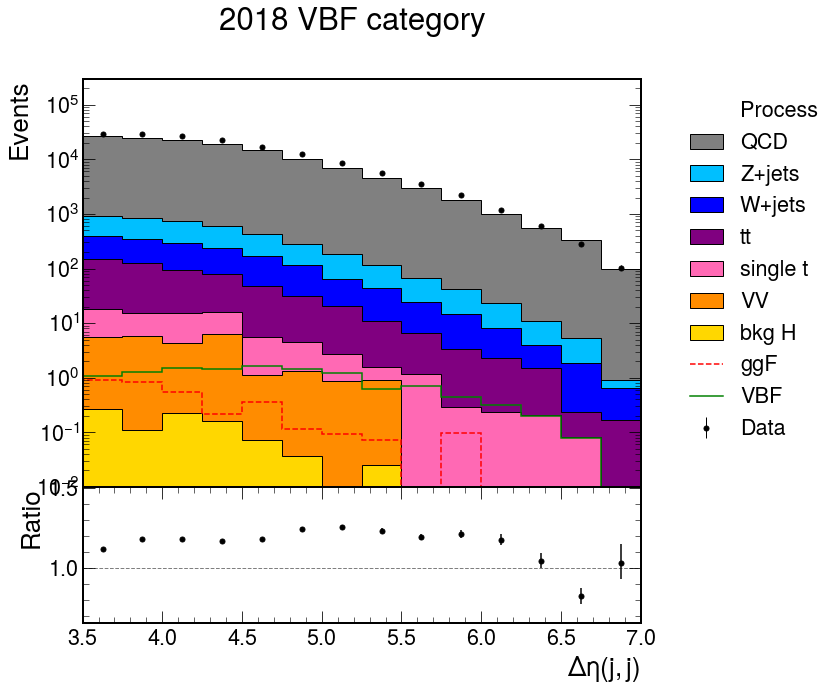

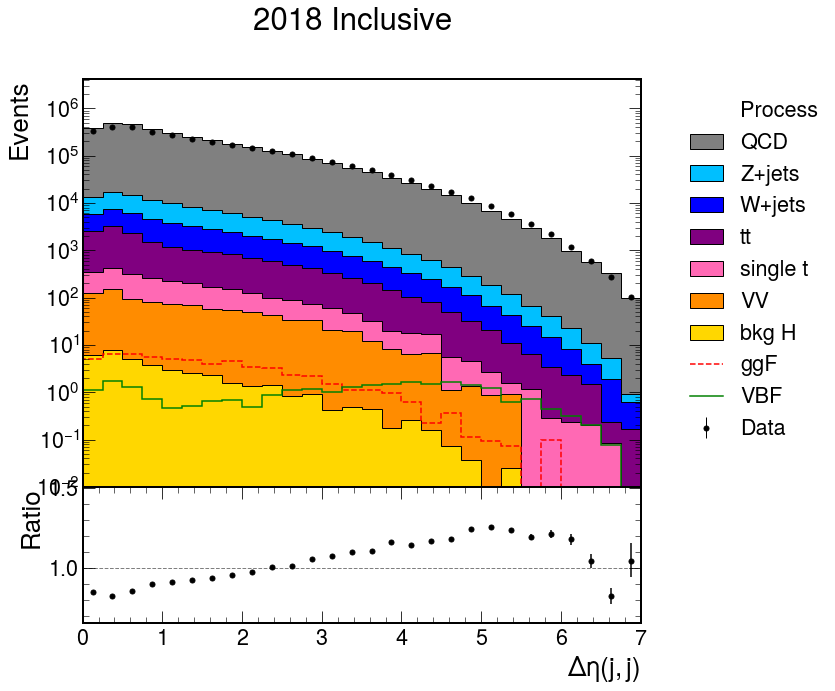

In [9]:
plot_datamc_ggfvbf(smalljetkin_ggf.sum('dphi','mjj'), year+'/datamc_ggf_deta', '$\Delta \eta (j,j)$', year+' ggF category',xlim=0)
plot_datamc_ggfvbf(smalljetkin_vbf.sum('dphi','mjj'), year+'/datamc_vbf_deta', '$\Delta \eta (j,j)$', year+' VBF category',xlim=3.5)
plot_datamc_ggfvbf(smalljetkin_tot.sum('dphi','mjj'), year+'/datamc_tot_deta', '$\Delta \eta (j,j)$', year+' Inclusive',xlim=0)

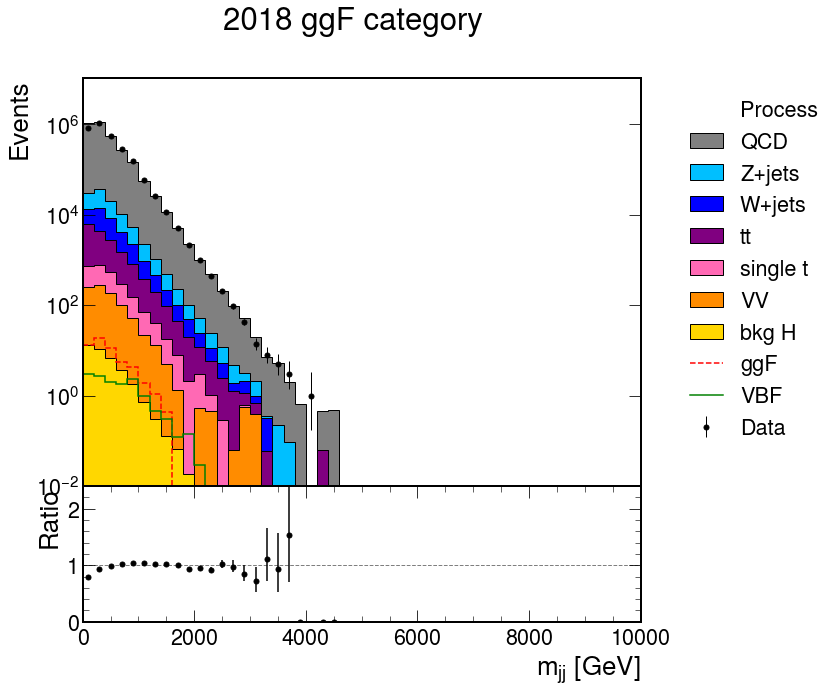

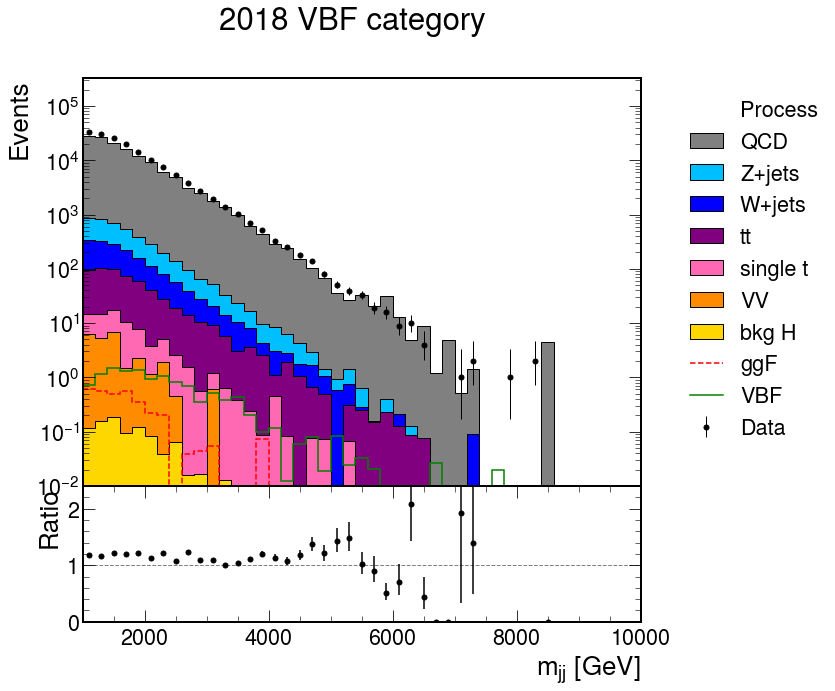

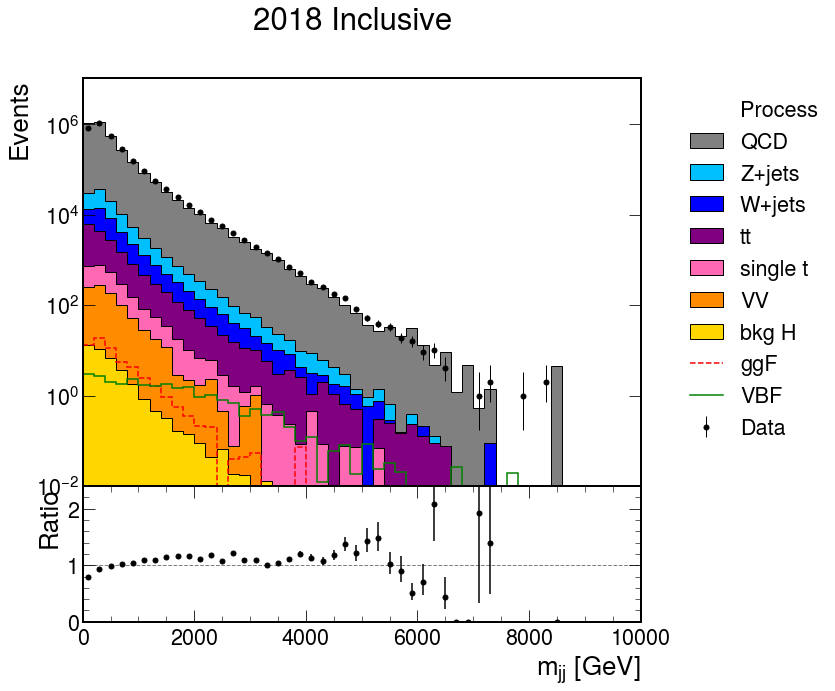

In [10]:
plot_datamc_ggfvbf(smalljetkin_ggf.sum('deta','dphi'), year+'/datamc_ggf_mjj', '$m_{jj}$ [GeV]', year+' ggF category')
plot_datamc_ggfvbf(smalljetkin_vbf.sum('deta','dphi'), year+'/datamc_vbf_mjj', '$m_{jj}$ [GeV]', year+' VBF category',xlim=1000)
plot_datamc_ggfvbf(smalljetkin_tot.sum('deta','dphi'), year+'/datamc_tot_mjj', '$m_{jj}$ [GeV]', year+' Inclusive')

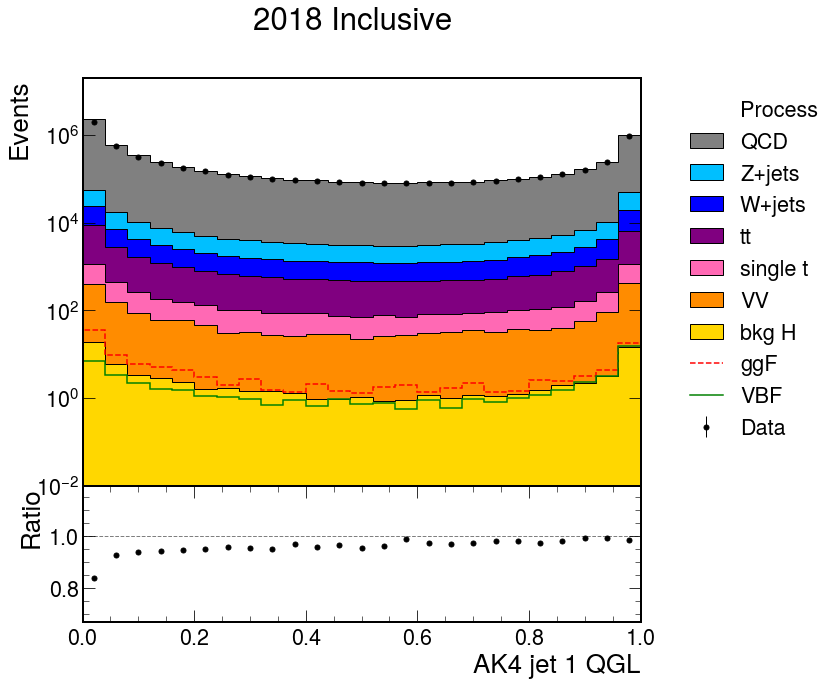

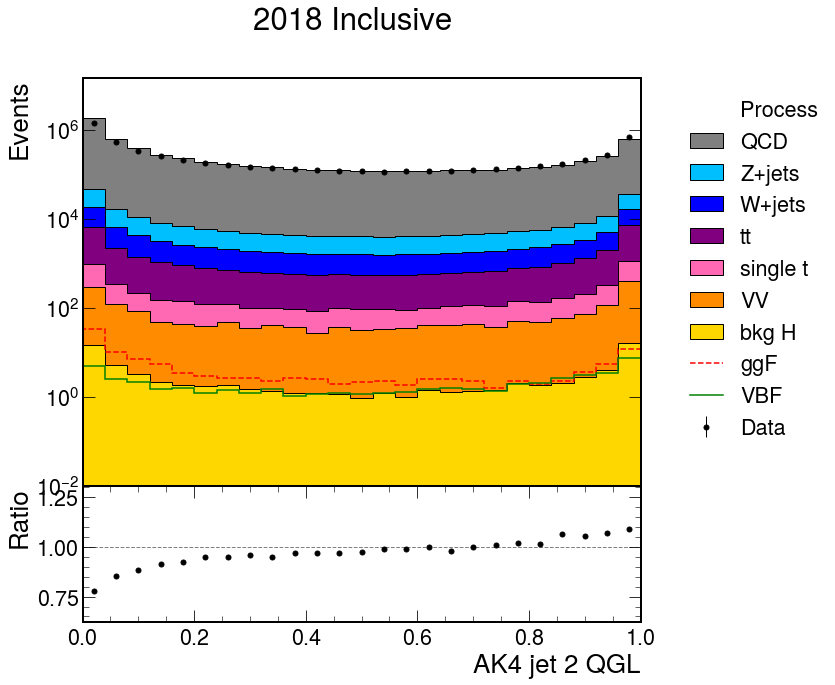

In [11]:
plot_datamc_ggfvbf(smalljetflav_tot.sum('qgl2',), year+'/datamc_tot_qgl1', 'AK4 jet 1 QGL', year+' Inclusive')
plot_datamc_ggfvbf(smalljetflav_tot.sum('qgl1',), year+'/datamc_tot_qgl2', 'AK4 jet 2 QGL', year+' Inclusive')

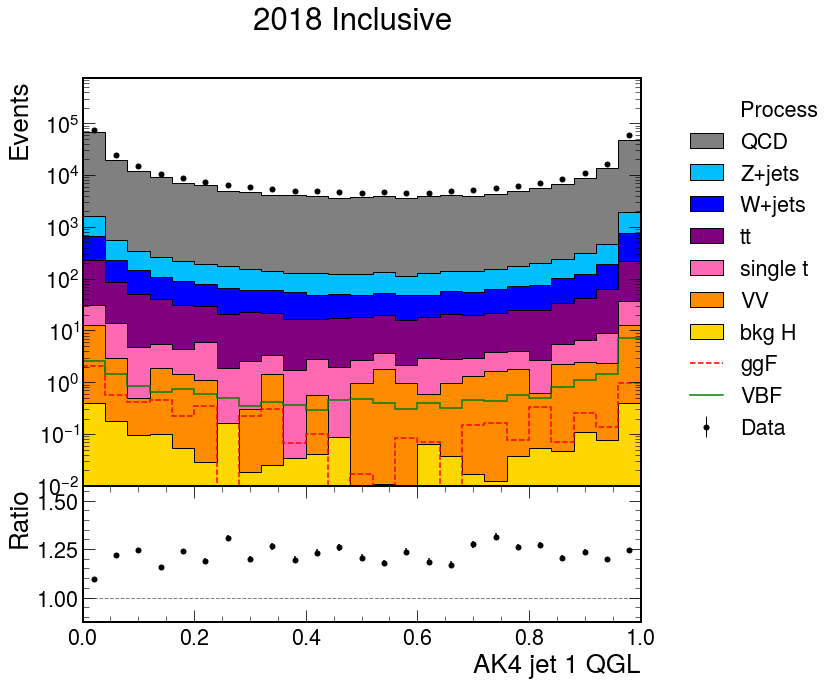

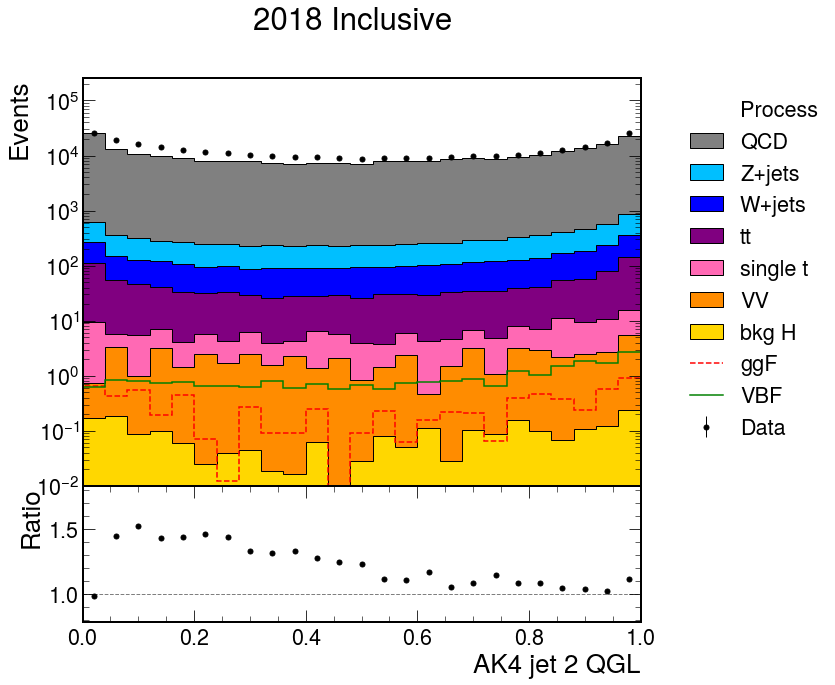

In [12]:
plot_datamc_ggfvbf(smalljetflav_vbf.sum('qgl2',), year+'/datamc_vbf_qgl1', 'AK4 jet 1 QGL', year+' Inclusive')
plot_datamc_ggfvbf(smalljetflav_vbf.sum('qgl1',), year+'/datamc_vbf_qgl2', 'AK4 jet 2 QGL', year+' Inclusive')